# 1 - Importación de librerías

In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime
import requests
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

import re

# IQR/Z score.
from scipy.stats import stats

# Seleción de variables.
from sklearn.feature_selection import SelectKBest

# Modelos Selección.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Modelos.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Preprocesado.
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
import pickle
# Métricas.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report
#Encoding
from sklearn.preprocessing import LabelEncoder


# 2 - Carga inicial Data sets y unificación

In [ ]:
#Carga de data sets
tr_labels=pd.read_csv('tr_labels.csv')
tr_values=pd.read_csv('tr_values.csv')
tst=pd.read_csv('tst_values.csv')

In [ ]:
#lectura de data sets
tr_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
#lectura de data sets
tr_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
#lectura de data sets
tst

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [ ]:
#Compruebo que tenga el mismo tamaño
print('Lables train:', tr_labels.shape[0])
print('Values train:', tr_values.shape[0])

Lables train: 59400
Values train: 59400


In [ ]:
#Unifico mis data frames de train
tr=pd.merge(tr_labels,tr_values,on='id',how='left')
tr

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


# 3 - Pre procesado y limpieza de datos de TR (Mis variables de entrenamiento)

In [ ]:
#Observo mis variables
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [ ]:
#Defino mis variable categóricas y numéricas
cat_cols=tr.select_dtypes(include=['object','category']).columns
num_cols=tr.select_dtypes(exclude=['object','category']).columns

In [ ]:
#Observo mis variables categóricas para saber que tratamiento puede ser óptimo para estas
tr[cat_cols].describe()

,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,55765,55745,59400,59400,59029,59400,59400,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,3,356,1897,2145,37400,9,19287,21,125,2092,...,7,8,6,5,5,10,7,3,7,6
top,functional,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,32259,572,9084,17402,3563,10248,508,5294,2503,307,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [ ]:
#Observo mis variables numéricas para saber que tratamiento puede ser óptimo para estas
tr[num_cols].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## 3.1. Tratamiento de nulos

In [ ]:
tr.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [ ]:
#Mis variables cuyos valores nulos son 'NO': funder, installer, subvillage, public_meeting, scheme_management,scheme_name,permit
var_no=['funder','installer','subvillage','public_meeting','scheme_name','scheme_management','permit']

for i in var_no:
    tr[i].fillna('No',inplace=True)

In [ ]:
#Compruebo que ya no quedan nulls
tr.isnull().sum()

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

## 3.2. Transformación variables a numéricas

#### Primero obtendré la antiguedad que ha tenido cada bomba de agua
De esta forma podré eliminar mi variable de fecha y a cambio obtendré una variable numérica que me proporciona información

In [ ]:
tr['antiguedad'] = pd.to_datetime('2023-03-30') - pd.to_datetime(tr['date_recorded'])
tr['antiguedad'] = tr['antiguedad'].dt.days

In [ ]:
#Se elimina la variable original pues ya está convertida a numérica.
tr.drop(columns = "date_recorded", inplace = True)

In [ ]:
#Voy a quitar las variable que no suponen nada para mi modelo y además era la única binaria
tr.drop('recorded_by',axis=1, inplace=True)

#### Transformo manualmente aquellas variables con menos de 10 valores distintos

In [ ]:
tr.nunique()

id                       59400
status_group                 3
amount_tsh                  98
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19288
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
scheme_management           13
scheme_name               2696
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

In [ ]:
#Defino mis variables con menos de 12 valores
col12 = [col for col in tr.columns if tr[col].nunique() < 12]

In [ ]:
#Obtengo los valores únicos y obtengo mis funciones para hacer el Remplace fácil
for col in col12:
    unique_values = tr[col].unique()
    values_str = "', '".join(map(str, unique_values))
    print(f"tr.{col}.replace(('{values_str}'),(1,2),inplace=True)")

tr.status_group.replace(('functional', 'non functional', 'functional needs repair'),(1,2),inplace=True)
tr.basin.replace(('Lake Nyasa', 'Lake Victoria', 'Pangani', 'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'),(1,2),inplace=True)
tr.public_meeting.replace(('True', 'No', 'False'),(1,2),inplace=True)
tr.permit.replace(('False', 'True', 'No'),(1,2),inplace=True)
tr.extraction_type_class.replace(('gravity', 'submersible', 'handpump', 'other', 'motorpump', 'wind-powered', 'rope pump'),(1,2),inplace=True)
tr.management_group.replace(('user-group', 'other', 'commercial', 'parastatal', 'unknown'),(1,2),inplace=True)
tr.payment.replace(('pay annually', 'never pay', 'pay per bucket', 'unknown', 'pay when scheme fails', 'other', 'pay monthly'),(1,2),inplace=True)
tr.payment_type.replace(('annually', 'never pay', 'per bucket', 'unknown', 'on failure', 'other', 'monthly'),(1,2),inplace=True)
tr.water_quality.replace(('soft', 'salty', 'milky', 'unkn

In [ ]:
#Hago los remplazamientos
tr.status_group.replace(('functional', 'non functional', 'functional needs repair'),
                        (1,2,3),inplace=True)
tr.basin.replace(('Lake Nyasa', 'Lake Victoria', 'Pangani', 'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'),
                 (1,2,3,4,5,6,7,8,9),inplace=True)
tr.public_meeting.replace(('True', 'No', 'False'),
                          (1,2,3),inplace=True)
tr.permit.replace(('False', 'True', 'No'),
                  (1,2,3),inplace=True)
tr.extraction_type_class.replace(('gravity', 'submersible', 'handpump', 'other', 'motorpump', 'wind-powered', 'rope pump'),
                                 (1,2,3,4,5,6,7),inplace=True)
tr.management_group.replace(('user-group', 'other', 'commercial', 'parastatal', 'unknown'),
                            (1,2,3,4,5),inplace=True)
tr.payment.replace(('pay annually', 'never pay', 'pay per bucket', 'unknown', 'pay when scheme fails', 'other', 'pay monthly'),
                   (1,2,3,4,5,6,7),inplace=True)
tr.payment_type.replace(('annually', 'never pay', 'per bucket', 'unknown', 'on failure', 'other', 'monthly'),
                        (1,2,3,4,5,6,7),inplace=True)
tr.water_quality.replace(('soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured', 'salty abandoned', 'fluoride abandoned'),
                         (1,2,3,4,5,6,7,8),inplace=True)
tr.quality_group.replace(('good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'),
                         (1,2,3,4,5,6),inplace=True)
tr.quantity.replace(('enough', 'insufficient', 'dry', 'seasonal', 'unknown'),
                    (1,2,3,4,5),inplace=True)
tr.quantity_group.replace(('enough', 'insufficient', 'dry', 'seasonal', 'unknown'),
                          (1,2,3,4,5),inplace=True)
tr.source.replace(('spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other', 'shallow well', 'river', 'hand dtw', 'lake', 'unknown'),
                  (1,2,3,4,5,6,7,8,9,10),inplace=True)
tr.source_type.replace(('spring', 'rainwater harvesting', 'dam', 'borehole', 'other', 'shallow well', 'river/lake'),
                       (1,2,3,4,5,6,7),inplace=True)
tr.source_class.replace(('groundwater', 'surface', 'unknown'),
                        (1,2,3),inplace=True)
tr.waterpoint_type.replace(('communal standpipe', 'communal standpipe multiple', 'hand pump', 'other', 'improved spring', 'cattle trough', 'dam'),
                           (1,2,3,4,5,6,7),inplace=True)
tr.waterpoint_type_group.replace(('communal standpipe', 'hand pump', 'other', 'improved spring', 'cattle trough', 'dam'),
                                 (1,2,3,4,5,6),inplace=True)

#### A continuación transformo el resto de variables con Label Encoder

In [ ]:
#Label Encoder
le=LabelEncoder()

In [ ]:
#funder
le.fit(tr.funder.unique())
tr.funder=le.transform(tr.funder)

In [ ]:
#installer
le.fit(tr.installer.unique())
tr.installer=le.transform(tr.installer)

In [ ]:
#wpt_name
le.fit(tr.wpt_name.unique())
tr.wpt_name=le.transform(tr.wpt_name)

In [ ]:
#subvillage
le.fit(tr.subvillage.unique())
tr.subvillage=le.transform(tr.subvillage)

In [ ]:
#region
le.fit(tr.region.unique())
tr.region=le.transform(tr.region)

In [ ]:
#lga
le.fit(tr.lga.unique())
tr.lga=le.transform(tr.lga)

In [ ]:
#ward
le.fit(tr.ward.unique())
tr.ward=le.transform(tr.ward)

In [ ]:
#public_meeting
le.fit(tr.public_meeting.unique())
tr.public_meeting=le.transform(tr.public_meeting)

In [ ]:
#scheme_management
le.fit(tr.scheme_management.unique())
tr.scheme_management=le.transform(tr.scheme_management)

In [ ]:
#scheme_name
le.fit(tr.scheme_name.unique())
tr.scheme_name=le.transform(tr.scheme_name)

In [ ]:
#permit
le.fit(tr.permit.unique())
tr.permit=le.transform(tr.permit)

In [ ]:
#extraction_type
le.fit(tr.extraction_type.unique())
tr.extraction_type=le.transform(tr.extraction_type)

In [ ]:
#extraction_type_group
le.fit(tr.extraction_type_group.unique())
tr.extraction_type_group=le.transform(tr.extraction_type_group)

In [ ]:
#management
le.fit(tr.management.unique())
tr.management=le.transform(tr.management)

In [ ]:
#Observo como ha quedado mi dataset con todas las variables convertidas a numéricas
tr.set_index('id',inplace=True)
tr

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,antiguedad
id,,,,,,,,,,,,,,,,,,,,,
69572,1,6000.0,1369,1390,1518,34.938093,-9.856322,37399,0,1,...,1,1,1,1,1,1,1,1,1,4399
8776,1,0.0,469,1399,545,34.698766,-2.147466,37195,0,2,...,1,1,2,2,2,2,2,1,1,3676
34310,1,25.0,825,686,2048,37.460664,-3.821329,14572,0,3,...,1,1,1,1,3,3,2,2,1,3685
67743,2,0.0,1741,263,1852,38.486161,-11.155298,37285,0,4,...,1,1,3,3,4,4,1,2,1,3713
19728,1,0.0,20,0,119,31.130847,-1.825359,35529,0,2,...,1,1,4,4,2,2,2,1,1,4278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,1,10.0,436,1210,201,37.169807,-3.253847,513,0,3,...,1,1,1,1,1,1,1,1,1,3618
27263,1,4700.0,177,1212,265,35.249991,-9.070629,24074,0,8,...,1,1,1,1,7,7,2,1,1,4345
37057,1,0.0,1136,0,1296,34.017087,-8.750434,27926,0,8,...,5,5,1,1,4,4,1,3,2,4371


In [ ]:
#Compruebo que efectivamente todas sean numéricas
tr.dtypes

status_group               int64
amount_tsh               float64
funder                     int32
gps_height                 int64
installer                  int32
longitude                float64
latitude                 float64
wpt_name                   int32
num_private                int64
basin                      int64
subvillage                 int32
region                     int32
region_code                int64
district_code              int64
lga                        int32
ward                       int32
population                 int64
public_meeting             int32
scheme_management          int32
scheme_name                int32
permit                     int32
construction_year          int64
extraction_type            int32
extraction_type_group      int32
extraction_type_class      int64
management                 int32
management_group           int64
payment                    int64
payment_type               int64
water_quality              int64
quality_gr

In [ ]:
#Ahora puedo observar las correlaciones entre variables
names=tr.columns
print(names)

Index(['status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'antiguedad'],
      dtype='object')


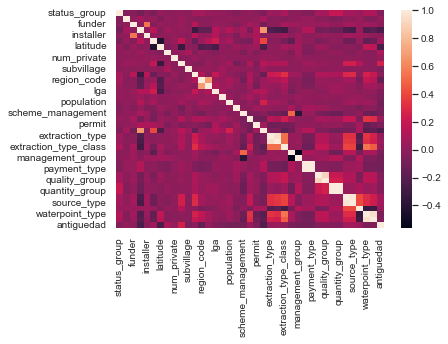

In [ ]:
list_correlacion = ['status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'antiguedad']

tr_correlacion = tr[list_correlacion]
correlation_mat = tr_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

## 4 - Pre procesado y limpieza de datos de TST (Mis variables de test)

In [ ]:
#Observo mis variables
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

### 4.1. Tratamiento de nulos

In [ ]:
tst.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [ ]:
#Mis variables cuyos valores nulos son 'NO': funder, installer, subvillage, public_meeting, scheme_management,scheme_name,permit
var_no=['funder','installer','subvillage','public_meeting','scheme_name','scheme_management','permit']

for i in var_no:
    tst[i].fillna('No',inplace=True)

In [ ]:
tst.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

### 4.2. Transformación variables a numéricas

#### Primero obtendré la antiguedad que ha tenido cada bomba de agua
De esta forma podré eliminar mi variable de fecha y a cambio obtendré una variable numérica que me proporciona información

In [ ]:
tst['antiguedad'] = pd.to_datetime('2023-03-30') - pd.to_datetime(tst['date_recorded'])
tst['antiguedad'] = tst['antiguedad'].dt.days

In [ ]:
#Se elimina la variable original pues ya está convertida a numérica.
tst.drop(columns = "date_recorded", inplace = True)

In [ ]:
#Voy a quitar las variable que no suponen nada para mi modelo y además era la única binaria
tst.drop('recorded_by',axis=1, inplace=True)

#### Transformo manualmente aquellas variables con menos de 10 valores distintos

In [ ]:
tst.nunique()

id                       14850
amount_tsh                  68
funder                     980
gps_height                2157
installer                 1091
longitude                14390
latitude                 14390
wpt_name                 10840
num_private                 36
basin                        9
subvillage                8444
region                      21
region_code                 26
district_code               20
lga                        125
ward                      1959
population                 637
public_meeting               3
scheme_management           12
scheme_name               1790
permit                       3
construction_year           55
extraction_type             17
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity

In [ ]:
tst.basin.replace(('Lake Nyasa', 'Lake Victoria', 'Pangani', 'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'),
                 (1,2,3,4,5,6,7,8,9),inplace=True)
tst.public_meeting.replace(('True', 'No', 'False'),
                          (1,2,3),inplace=True)
tst.permit.replace(('False', 'True', 'No'),
                  (1,2,3),inplace=True)
tst.extraction_type_class.replace(('gravity', 'submersible', 'handpump', 'other', 'motorpump', 'wind-powered', 'rope pump'),
                                 (1,2,3,4,5,6,7),inplace=True)
tst.management_group.replace(('user-group', 'other', 'commercial', 'parastatal', 'unknown'),
                            (1,2,3,4,5),inplace=True)
tst.payment.replace(('pay annually', 'never pay', 'pay per bucket', 'unknown', 'pay when scheme fails', 'other', 'pay monthly'),
                   (1,2,3,4,5,6,7),inplace=True)
tst.payment_type.replace(('annually', 'never pay', 'per bucket', 'unknown', 'on failure', 'other', 'monthly'),
                        (1,2,3,4,5,6,7),inplace=True)
tst.water_quality.replace(('soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured', 'salty abandoned', 'fluoride abandoned'),
                         (1,2,3,4,5,6,7,8),inplace=True)
tst.quality_group.replace(('good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'),
                         (1,2,3,4,5,6),inplace=True)
tst.quantity.replace(('enough', 'insufficient', 'dry', 'seasonal', 'unknown'),
                    (1,2,3,4,5),inplace=True)
tst.quantity_group.replace(('enough', 'insufficient', 'dry', 'seasonal', 'unknown'),
                          (1,2,3,4,5),inplace=True)
tst.source.replace(('spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other', 'shallow well', 'river', 'hand dtw', 'lake', 'unknown'),
                  (1,2,3,4,5,6,7,8,9,10),inplace=True)
tst.source_type.replace(('spring', 'rainwater harvesting', 'dam', 'borehole', 'other', 'shallow well', 'river/lake'),
                       (1,2,3,4,5,6,7),inplace=True)
tst.source_class.replace(('groundwater', 'surface', 'unknown'),
                        (1,2,3),inplace=True)
tst.waterpoint_type.replace(('communal standpipe', 'communal standpipe multiple', 'hand pump', 'other', 'improved spring', 'cattle trough', 'dam'),
                           (1,2,3,4,5,6,7),inplace=True)
tst.waterpoint_type_group.replace(('communal standpipe', 'hand pump', 'other', 'improved spring', 'cattle trough', 'dam'),
                                 (1,2,3,4,5,6),inplace=True)

#### A continuación transformo el resto de variables con Label Encoder

In [ ]:
#Label Encoder
le=LabelEncoder()

In [ ]:
#funder
le.fit(tst.funder.unique())
tst.funder=le.transform(tst.funder)

In [ ]:
#installer
le.fit(tst.installer.unique())
tst.installer=le.transform(tst.installer)

In [ ]:
#wpt_name
le.fit(tst.wpt_name.unique())
tst.wpt_name=le.transform(tst.wpt_name)

In [ ]:
#subvillage
le.fit(tst.subvillage.unique())
tst.subvillage=le.transform(tst.subvillage)

In [ ]:
#region
le.fit(tst.region.unique())
tst.region=le.transform(tst.region)

In [ ]:
#lga
le.fit(tst.lga.unique())
tst.lga=le.transform(tst.lga)

In [ ]:
#ward
le.fit(tst.ward.unique())
tst.ward=le.transform(tst.ward)

In [ ]:
#public_meeting
le.fit(tst.public_meeting.unique())
tst.public_meeting=le.transform(tst.public_meeting)

In [ ]:
#scheme_management
le.fit(tst.scheme_management.unique())
tst.scheme_management=le.transform(tst.scheme_management)

In [ ]:
#scheme_name
le.fit(tst.scheme_name.unique())
tst.scheme_name=le.transform(tst.scheme_name)

In [ ]:
#permit
le.fit(tst.permit.unique())
tst.permit=le.transform(tst.permit)

In [ ]:
#extraction_type
le.fit(tst.extraction_type.unique())
tst.extraction_type=le.transform(tst.extraction_type)

In [ ]:
#extraction_type_group
le.fit(tst.extraction_type_group.unique())
tst.extraction_type_group=le.transform(tst.extraction_type_group)

In [ ]:
#management
le.fit(tst.management.unique())
tst.management=le.transform(tst.management)

In [ ]:
#Observo como ha quedado mi dataset con todas las variables convertidas a numéricas
tst.set_index('id', inplace=True)
tst

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,antiguedad
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,175,1996,214,35.290799,-4.059696,656,0,5,3916,...,1,1,4,4,2,2,2,4,3,3706
51630,0.0,250,1569,221,36.656709,-3.309214,1780,0,3,2717,...,1,1,2,2,1,1,1,1,1,3706
17168,0.0,590,1567,664,34.767863,-5.004344,9673,0,5,5398,...,1,1,2,2,2,2,2,4,3,3709
45559,0.0,222,267,262,38.058046,-9.418672,5595,0,4,2795,...,1,1,3,3,6,6,1,4,3,3719
49871,500.0,73,1260,75,35.006123,-10.950412,5706,0,4,3544,...,1,1,1,1,1,1,1,1,1,3655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,145,34,226,38.852669,-6.582841,7223,0,7,8403,...,1,1,1,1,7,7,2,1,1,4417
18990,1000.0,286,0,319,37.451633,-5.350428,332,0,3,5028,...,2,2,2,2,6,6,1,3,2,4392
28749,0.0,590,1476,664,34.739804,-4.585587,457,0,5,1833,...,1,1,2,2,3,3,2,1,1,3678


In [ ]:
#Compruebo que efectivamente todas sean numéricas
tst.dtypes

amount_tsh               float64
funder                     int32
gps_height                 int64
installer                  int32
longitude                float64
latitude                 float64
wpt_name                   int32
num_private                int64
basin                      int64
subvillage                 int32
region                     int32
region_code                int64
district_code              int64
lga                        int32
ward                       int32
population                 int64
public_meeting             int32
scheme_management          int32
scheme_name                int32
permit                     int32
construction_year          int64
extraction_type            int32
extraction_type_group      int32
extraction_type_class      int64
management                 int32
management_group           int64
payment                    int64
payment_type               int64
water_quality              int64
quality_group              int64
quantity  

## 5 - Modelo analítico de clasificación que sea capaz de predecir el status

In [ ]:
#Hago mi partición training - test
X_train, X_test, y_train, y_test = train_test_split (tr.drop('status_group', axis=1),
                                                     tr.status_group,
                                                     test_size = 0.2,
                                                     random_state = 0,
                                                     stratify = tr.status_group)

In [ ]:
#Hacemos la predicción con Random Forest
classifier_rf = RandomForestClassifier().fit(X_train, y_train)
pred_rf = classifier_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           1       0.81      0.90      0.85      6452
           2       0.85      0.79      0.82      4565
           3       0.59      0.37      0.46       863

    accuracy                           0.82     11880
   macro avg       0.75      0.69      0.71     11880
weighted avg       0.81      0.82      0.81     11880



In [ ]:
#Hacemos la predicción con LinearSVC
classifier_LS = LinearSVC(penalty='l1', dual= False).fit(X_train, y_train)
pred_LS = classifier_LS.predict(X_test)
print(classification_report(y_test, pred_LS))

              precision    recall  f1-score   support

           1       0.64      0.81      0.72      6452
           2       0.62      0.50      0.55      4565
           3       0.00      0.00      0.00       863

    accuracy                           0.63     11880
   macro avg       0.42      0.44      0.42     11880
weighted avg       0.59      0.63      0.60     11880



C:\Users\mauri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Me quedo con mi predicción con Random Forest que es el que me da más precisión.

## 6 - Predicción con test

In [ ]:
#Defino mi modelo de predicción
modelo_pred = classifier_rf.predict(tst)
modelo_pred = (pd.DataFrame(modelo_pred,columns=['status_group'],index=tst.index))

In [ ]:
modelo_pred

,status_group
id,
50785,1
51630,1
17168,1
45559,2
49871,1
...,...
39307,2
18990,1
28749,1


In [ ]:
modelo_pred.reset_index('id',inplace=True)

In [ ]:
#Sustituyo los valores para hacer la submission
modelo_pred.status_group.replace((1,2,3),('functional', 'non functional', 'functional needs repair'),inplace=True)
modelo_pred

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
#Guardo mi predicción en CSV para poderlo subir.
modelo_pred.to_csv('pumpit_project.csv', index=False)

Con este modelo he conseguido una puntuación de 0.8092

## 7 - Pruebas para mejorar el modelo

### A) Selección de variables

In [ ]:
#Observo que variable tiene más importancia dentro de mi modelo
imp = {}
for i in range(len(X_train.columns)):
    imp[X_train.columns[i]] = [classifier_rf.feature_importances_[i]]
pd.DataFrame.from_dict(imp, orient="index", columns=["Importance"]).sort_values("Importance", ascending=False).head(38).style.background_gradient()

,Importance
longitude,0.081902
latitude,0.078290
quantity_group,0.061945
quantity,0.059339
wpt_name,0.059052
subvillage,0.053942
antiguedad,0.046124
gps_height,0.044752
construction_year,0.035512
ward,0.035258


In [ ]:
#voy a probar a quitar todas aquellas que no alcancen 0,02
tr.drop(['extraction_type_group','district_code','extraction_type','source','payment','region_code','management','region','payment_type','basin','scheme_management','source_type','public_meeting','permit','water_quality','quality_group','management_group','source_class','num_private'],
        axis=1, inplace=True)
tst.drop(['extraction_type_group','district_code','extraction_type','source','payment','region_code','management','region','payment_type','basin','scheme_management','source_type','public_meeting','permit','water_quality','quality_group','management_group','source_class','num_private'],axis=1, inplace=True)

In [ ]:
#Hago mi partición training - test
X_train, X_test, y_train, y_test = train_test_split (tr.drop('status_group', axis=1),
                                                     tr.status_group,
                                                     test_size = 0.2,
                                                     random_state = 0,
                                                     stratify = tr.status_group)

In [ ]:
#Hacemos la predicción con Random Forest
classifier_rf_2 = RandomForestClassifier().fit(X_train, y_train)
pred_rf_2 = classifier_rf_2.predict(X_test)
print(classification_report(y_test, pred_rf_2))

              precision    recall  f1-score   support

           1       0.80      0.89      0.85      6452
           2       0.84      0.77      0.81      4565
           3       0.59      0.33      0.43       863

    accuracy                           0.81     11880
   macro avg       0.74      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



In [ ]:
#Defino mi modelo de predicción 2
modelo_pred_2 = classifier_rf_2.predict(tst)
modelo_pred_2 = (pd.DataFrame(modelo_pred_2,columns=['status_group'],index=tst.index))

In [ ]:
modelo_pred_2.reset_index('id',inplace=True)
modelo_pred_2

,id,status_group
0,50785,2
1,51630,1
2,17168,2
3,45559,2
4,49871,1
...,...,...
14845,39307,2
14846,18990,1
14847,28749,1
14848,33492,1


In [ ]:
#Sustituyo los valores para hacer la submission
modelo_pred_2.status_group.replace((1,2,3),('functional', 'non functional', 'functional needs repair'),inplace=True)
modelo_pred_2

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
#Guardo mi predicción en CSV para poderlo subir.
modelo_pred_2.to_csv('pumpit_project_2.csv', index=False)

A la hora de subir mis resultados a la plataforma me da un 0.7868 frente al 0.8092 que recibí gracias al primer modelo (modelo_pred).

Por lo que por ahora no lo incluiré en mi modelo

### B) Tunning de hiperparámetros

In [ ]:
#Añado el diccionario con los hiperparámetros
grid_param = {
    'n_estimators': [100,300,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [16,20,22,24],
    'max_features': ['auto', 'sqrt'],

}

In [ ]:
#Defino la función para estratificar
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [ ]:
#Defino el modelo en base a la curva ROC y el modelo de Random Forest que escogí anteriormente
model_grid = GridSearchCV(estimator=classifier_rf,
                     param_grid=grid_param,
                     scoring='roc_auc',
                     cv=stratified_kfold,
                     n_jobs=-1)

model_grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 20, 22, 24],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
#Hago el fit de mi modelo con mi partición
model_grid.fit(X_train, y_train)

C:\Users\mauri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 20, 22, 24],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
#Obtengo mis mejores parámetros
print(model_grid.best_params_)

{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
#Obtengo mi mejor score
print(model_grid.best_score_)

nan


In [ ]:
#Hacemos la predicción con Random Forest
classifier_rf_3 = RandomForestClassifier(criterion = 'entropy', n_estimators= 500, max_depth = 16, max_features= 'auto').fit(X_train, y_train)
pred_3 = classifier_rf_3.predict(X_test)

In [ ]:
#Defino mi modelo de predicción 3
modelo_pred_3 = classifier_rf_3.predict(tst)
modelo_pred_3 = (pd.DataFrame(modelo_pred_3,columns=['status_group'],index=tst.index))

In [ ]:
modelo_pred_3.reset_index('id',inplace=True)

In [ ]:
#Sustituyo los valores para hacer la submission
modelo_pred_3.status_group.replace((1,2,3),('functional', 'non functional', 'functional needs repair'),inplace=True)
modelo_pred_3

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
#Guardo mi predicción en CSV para poderlo subir
modelo_pred_3.to_csv('pumpit_project_3.csv', index=False)

A la hora de subir mis resultados a la plataforma me da un 0.8020 frente al 0.8092 que recibí en mi última súbida por lo que no tunearé mis parámetros

### C) Balanceo de datos

In [ ]:
#Hago mi conteo inicial
print("Before OverSampling, counts of label '3': {}".format(sum(tr.status_group==3)))
print("Before OverSampling, counts of label '2': {}".format(sum(tr.status_group==2)))
print("Before OverSampling, counts of label '1': {}".format(sum(tr.status_group==1)))

Before OverSampling, counts of label '3': 4317
Before OverSampling, counts of label '2': 22824
Before OverSampling, counts of label '1': 32259


In [ ]:
#Defino mi función para hacer el balanceado
sm = SMOTE(sampling_strategy={1: 32259, 2: 32259, 3:32259}, random_state=2)
tr_res, y_res = sm.fit_resample(tr.drop('status_group', axis=1), tr.status_group.ravel())

In [ ]:
#Obtengo mis resultados
print('After OverSampling, the shape of train_X: {}'.format(tr_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_res.shape))


print("After OverSampling, counts of label '3': {}".format(sum(y_res==3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))


After OverSampling, the shape of train_X: (96777, 19)
After OverSampling, the shape of train_y: (96777,)
After OverSampling, counts of label '3': 32259
After OverSampling, counts of label '2': 32259
After OverSampling, counts of label '1': 32259


In [ ]:
#Hago la partición una vez hecho el balanceo
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split (tr_res,
                                                     y_res,
                                                     test_size = 0.2,
                                                     random_state = 0,
                                                     stratify = y_res)

In [ ]:
#Hacemos la predicción con Random Forest
classifier_rf_4 = RandomForestClassifier(criterion = 'entropy', n_estimators= 500, max_depth = 16, max_features= 'auto').fit(X_train_res, y_train_res)
pred_4 = classifier_rf_4.predict(X_test_res)

In [ ]:
#Defino mi modelo de predicción 4
modelo_pred_4 = classifier_rf_4.predict(tst)
modelo_pred_4 = (pd.DataFrame(modelo_pred_4,columns=['status_group'],index=tst.index))

In [ ]:
modelo_pred_4.reset_index('id',inplace=True)
modelo_pred_4

,id,status_group
0,50785,2
1,51630,1
2,17168,2
3,45559,2
4,49871,1
...,...,...
14845,39307,2
14846,18990,1
14847,28749,1
14848,33492,1


In [ ]:
#Sustituyo los valores para hacer la submission
modelo_pred_4.status_group.replace((1,2,3),('functional', 'non functional', 'functional needs repair'),inplace=True)
modelo_pred_4

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
#Guardo mi predicción en CSV para poderlo subir
modelo_pred_4.to_csv('pumpit_project_4.csv', index=False)

A la hora de subir mis resultados a la plataforma me da un A la hora de subir mis resultados a la plataforma me da un 0.7661 frente al 0.8092 que recibí en mi última súbida por lo que no tunearé mis parámetros frente al 0.8092 que recibí en mi última súbida por lo que no haré balanceo de datos.

### D) Todas las pruebas a la vez

Ejecutando el código entero y subiendo el archivo último resultante ('pumpit_project_4.csv') he conseguido una nota de 0.7314 por lo que parece que todas las pruebas que he hecho no sirven para mejorar mi modelo de predicción.

## NOTA IMPORTANTE

He hecho una última ejecución del código entero para una mejor presentación final de este, sabiendo que mucha de las pruebas que he hecho afectaría a la siguiente, pero HE PROBADO TODAS DE FORMA INDIVIDUAL, dejando las otras sin ejecutar. Solo esta última, la he hecho interactuando entre ellas, ninguna me ha dado mejor resultado que mi primera subida.